# Step 1: Import data

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
files = ".\data.csv"
df = pd.read_csv(files)
# Tạo từ điển ánh xạ tên cột dài thành tên cột ngắn tương ứng
column_mapping = {
    "Đánh giá cơ sở vật chất của trường (phòng học, thư viện, căn tin,...).": "CSV",
    "Mức độ hài lòng về sự hiện đại và thuận tiện của cơ sở vật chất (ví dụ: có đủ máy lạnh, phòng học thoải mái, các tiện ích khác,...)": "HD-TV",
    "Đánh giá chất lượng giảng viên (kinh nghiệm, sự nhiệt huyết, khả năng truyền đạt kiến thức) .": "CLGV",
    "Mức độ hài lòng với sự sẵn có và sự hỗ trợ của giảng viên ngoài giờ học.": "HTGV",
    "Đánh giá chất lượng của các buổi học (tính tương tác, sự hấp dẫn).": "CLBH",
    "Mức độ hài lòng với phương pháp giảng dạy và tài liệu học được sử dụng.": "PPGD",
    "Đánh giá khả năng hỗ trợ tài chính hoặc học bổng từ trường.": "HTTC",
    "Mức độ hài lòng với các dịch vụ hỗ trợ sinh viên liên quan đến mức học phí mới (tư vấn, hỗ trợ về tài chính).": "DVSV",
    "Đánh giá tổng thể về trải nghiệm học tập tại trường.": "TNHT",
    "Bạn có cảm thấy sự tương xứng của mức học phí mới đối với chất lượng và trải nghiệm học tập.": "TXHP",
}

# Tạo và mở file để ghi chú thích từng cột
with open("column_mapping_explanation.txt", "w", encoding="utf-8") as file:
    # Ghi giải thích từng chữ viết tắt vào file
    for explanation in column_mapping.items():
        file.write(f"{explanation[1]}: {explanation[0]}\n")

# Đổi tên cột
df.rename(columns=column_mapping, inplace=True)
df.drop(columns=["Timestamp"], inplace=True)
df.head()

,CSV,HD-TV,CLGV,HTGV,CLBH,PPGD,HTTC,DVSV,TNHT,TXHP
0,3,5,5,5,4,5,5,1,4,2
1,3,3,5,3,4,3,4,3,4,3
2,4,4,5,4,4,3,2,2,3,3
3,3,3,5,4,4,4,1,1,3,3
4,4,4,3,2,3,2,2,2,3,3


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   CSV     52 non-null     int64
 1   HD-TV   52 non-null     int64
 2   CLGV    52 non-null     int64
 3   HTGV    52 non-null     int64
 4   CLBH    52 non-null     int64
 5   PPGD    52 non-null     int64
 6   HTTC    52 non-null     int64
 7   DVSV    52 non-null     int64
 8   TNHT    52 non-null     int64
 9   TXHP    52 non-null     int64
dtypes: int64(10)
memory usage: 4.2 KB


In [4]:
df.describe()

,CSV,HD-TV,CLGV,HTGV,CLBH,PPGD,HTTC,DVSV,TNHT,TXHP
count,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000
mean,3.480769,3.826923,3.961538,3.711538,3.615385,3.653846,2.923077,2.788462,3.307692,2.461538
std,1.019234,1.023664,0.989386,1.160401,0.910803,1.007513,1.340854,1.404985,0.960769,1.212056
min,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,2.000000,2.000000,3.000000,1.000000
50%,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,3.000000,3.000000,2.000000
75%,4.000000,5.000000,5.000000,5.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


# Step 2: Data Analysis

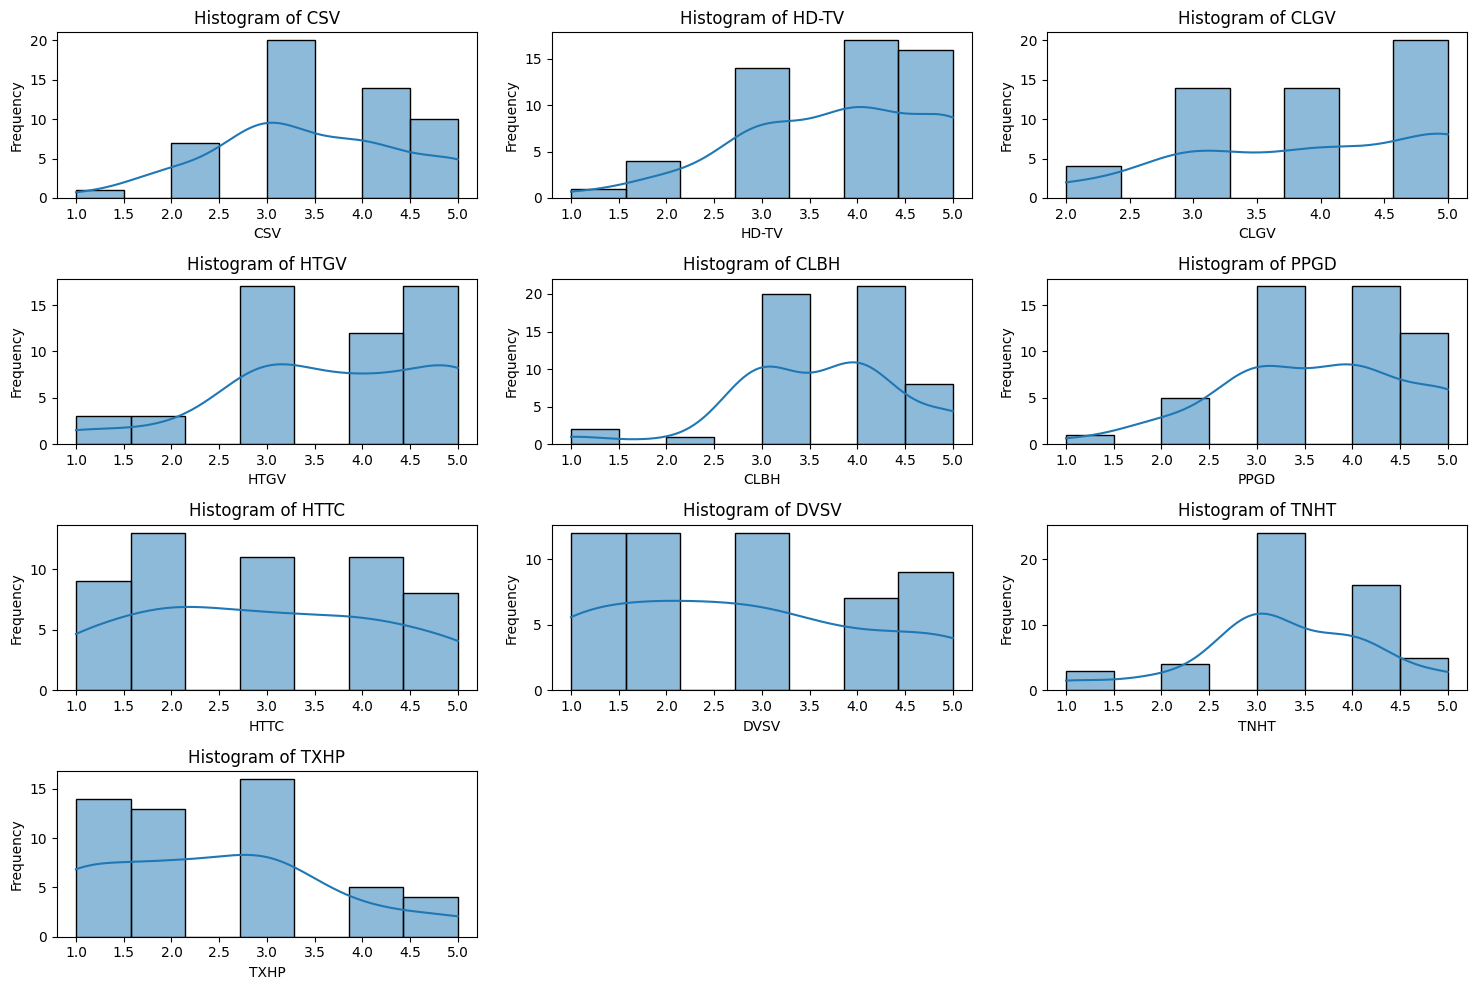

In [5]:
num_cols = 3
num_rows = (len(df.columns) - 1) // num_cols + 1

# Tạo subplot
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 10))

# Lặp qua từng cột và vẽ histogram
for i, column in enumerate(df.columns):
    ax = axes[i // num_cols, i % num_cols]
    sns.histplot(data=df[column], ax=ax, kde=True)
    ax.set_title(f'Histogram of {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Frequency')

# Xoá các subplot trống nếu có
for i in range(len(df.columns), num_rows * num_cols):
    fig.delaxes(axes.flatten()[i])

plt.tight_layout()
plt.show()

<Axes: >

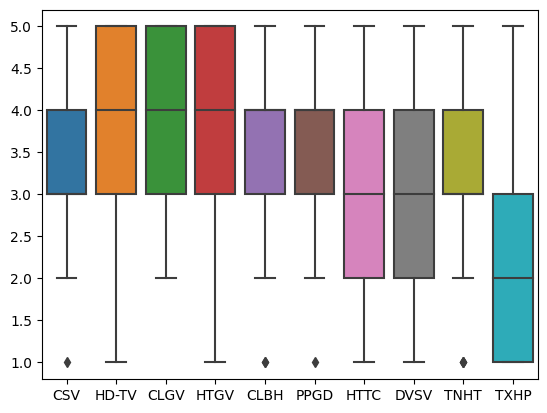

In [6]:
sns.boxplot(df)

In [7]:
for i in df.keys():
    print("'"+i+"'",end=',')

'CSV','HD-TV','CLGV','HTGV','CLBH','PPGD','HTTC','DVSV','TNHT','TXHP',

<Axes: >

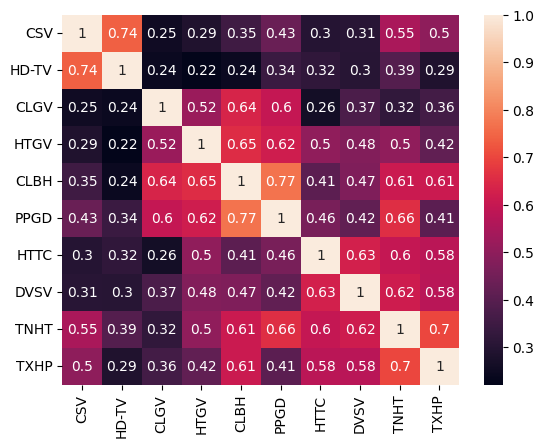

In [8]:
col_name = ['CSV','HD-TV','CLGV','HTGV','CLBH','PPGD','HTTC','DVSV','TNHT','TXHP']
corr = df[col_name].corr()
sns.heatmap(corr,annot=True)

# Step 3: Point Estimation (Phân tích mẫu và ước lượng tổng)

In [9]:
# Hàm tính trung bình và độ lệch chuẩn mẫu cho mỗi cột
def calculate_mean_and_std(dataframe):
    # Tính trung bình
    mean_values = dataframe.mean()
    
    # Tính độ lệch chuẩn mẫu
    std_values = dataframe.std(ddof=1)  # ddof=1 để tính độ lệch chuẩn mẫu

    # Tính phương sai mẫu
    s_var = std_values**2
    
    return mean_values, std_values,s_var

# Gọi hàm tính trung bình và độ lệch chuẩn mẫu
mean_values, std_values,s_var = calculate_mean_and_std(df)

# In kết quả
result_df = pd.concat([mean_values, std_values,s_var], axis=1)
result_df.columns = ['Mean', 'Sample Std','Sample Variance']  # Đặt tên cho các cột

result_df

,Mean,Sample Std,Sample Variance
CSV,3.480769,1.019234,1.038839
HD-TV,3.826923,1.023664,1.047888
CLGV,3.961538,0.989386,0.978884
HTGV,3.711538,1.160401,1.346531
CLBH,3.615385,0.910803,0.829563
PPGD,3.653846,1.007513,1.015083
HTTC,2.923077,1.340854,1.797888
DVSV,2.788462,1.404985,1.973982
TNHT,3.307692,0.960769,0.923077
TXHP,2.461538,1.212056,1.469080


In [10]:
from scipy.stats import t


def calculate_confidence_interval(row, alpha):
    
    mean = row['Mean']
    std = row['Sample Std']
    n = len(df)  # Số lượng mẫu
    
    t_critical = t.ppf(1 - alpha / 2, df=n - 1)  # Tính giá trị t_critical
    margin_of_error = t_critical * (std / np.sqrt(n))
    lower_mean = mean - margin_of_error
    upper_mean = mean + margin_of_error
    return lower_mean, upper_mean


alpha = 0.05
result_df["Lower Mean"], result_df["Upper Mean"] = zip(
    *result_df.apply(lambda row: calculate_confidence_interval(row, alpha), axis=1)
)
result_df

,Mean,Sample Std,Sample Variance,Lower Mean,Upper Mean
CSV,3.480769,1.019234,1.038839,3.197013,3.764526
HD-TV,3.826923,1.023664,1.047888,3.541933,4.111913
CLGV,3.961538,0.989386,0.978884,3.686092,4.236985
HTGV,3.711538,1.160401,1.346531,3.388481,4.034596
CLBH,3.615385,0.910803,0.829563,3.361815,3.868954
PPGD,3.653846,1.007513,1.015083,3.373353,3.934340
HTTC,2.923077,1.340854,1.797888,2.549781,3.296373
DVSV,2.788462,1.404985,1.973982,2.397311,3.179612
TNHT,3.307692,0.960769,0.923077,3.040213,3.575172
TXHP,2.461538,1.212056,1.469080,2.124100,2.798977


# Step 4: Mô hình hồi quy

In [11]:
from scipy.stats import f_oneway
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [12]:
# Phân chia dữ liệu thành các biến độc lập (X) và biến phụ thuộc (y)

X = df.iloc[:, :-1]  # Lấy tất cả các cột trừ cột cuối cùng
y = df.iloc[:, -1]  # Lấy cột cuối cùng

# Phân chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Tạo và fit mô hình Linear Regression
model = LinearRegression()
model.fit(X_train, y_train)

# Đánh giá mô hình trên tập kiểm tra
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# In ra các hệ số của mô hình
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

Mean Squared Error: 0.576490994622583
Coefficients: [ 0.45771322 -0.29849135  0.073908   -0.1748966   0.82515308 -0.71304854
  0.32967647  0.08920286  0.52268658]
Intercept: -0.9631319031677097


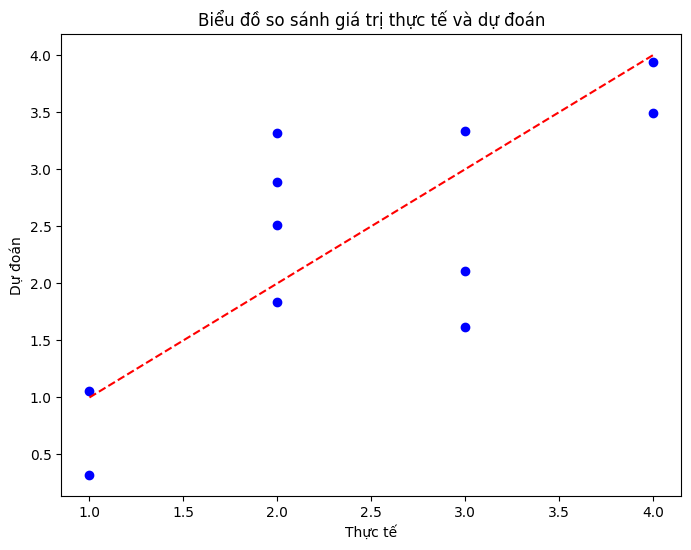

In [13]:
# Vẽ biểu đồ scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Thực tế')
plt.ylabel('Dự đoán')
plt.title('Biểu đồ so sánh giá trị thực tế và dự đoán')
plt.show()

# Step 5: Hypothesis Testing
- Kiểm định trung bình các đánh giá từng cột có > 3.5 hay ko
- H0: mean <= 3.5
- H1: mean > 3.5
- Conclusion  = 1 nếu Reject H0 (chấp nhận H1) 
-             = 0 nếu Fail to reject H0

In [16]:
from scipy import stats


def column_mean_test_with_conclusion(df, threshold, alter_type, alpha=0.05):
    """
    Para alternative: {"two-sided", "less", "greater"}
    """
    results = []
    for column in df.columns:
        # Lấy dữ liệu của cột
        data = df[column]

        # Kiểm tra xem có đủ mẫu để thực hiện kiểm định không
        if len(data) >= 2:
            # Thực hiện kiểm định t one-sample
            t_statistic, p_value = stats.ttest_1samp(
                a=data, popmean=threshold, alternative=alter_type
            )
            reject_null = 1 if p_value < alpha else 0
            results.append(
                {
                    "Column": column,
                    "t-statistic": t_statistic,
                    "p-value": p_value,
                    "alpha": alpha,
                    "Conclusion": reject_null,
                }
            )
        else:
            results.append(
                {
                    "Column": column,
                    "t-statistic": None,
                    "p-value": None,
                    "alpha": alpha,
                    "Conclusion": None,
                }
            )

    return pd.DataFrame(results)


# Sử dụng hàm để kiểm định thống kê cho từng cột và xuất kết quả thành bảng
threshold = 3.5  # Giá trị mà chúng ta muốn kiểm tra
alpha = 0.05  # Mức ý nghĩa
alter_type = "greater"
results_table = column_mean_test_with_conclusion(df, threshold, alter_type, alpha)

# In kết quả
results_table

,Column,t-statistic,p-value,alpha,Conclusion
0,CSV,-0.136058,0.553844,0.05,0
1,HD-TV,2.302978,0.012697,0.05,1
2,CLGV,3.363907,0.000733,0.05,1
3,HTGV,1.314567,0.097268,0.05,0
4,CLBH,0.913535,0.182630,0.05,0
5,PPGD,1.101127,0.138006,0.05,0
6,HTTC,-3.102689,0.998438,0.05,0
7,DVSV,-3.651981,0.999693,0.05,0
8,TNHT,-1.443376,0.922485,0.05,0
9,TXHP,-6.178305,1.000000,0.05,0
